Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

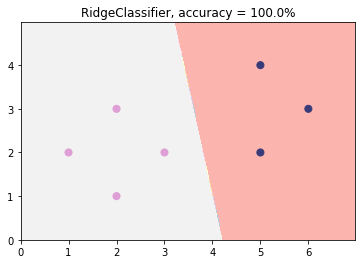

In [4]:
seven_rclf = RidgeClassifier(alpha=0.0).fit(seven_X, seven_y)

accuracy = accuracy_score(seven_y, seven_rclf.predict(seven_X))
plt.title("RidgeClassifier, accuracy = " + str(accuracy * 100.0) + "%")
mlutils.plot_2d_clf_problem(seven_X, seven_y, seven_rclf.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

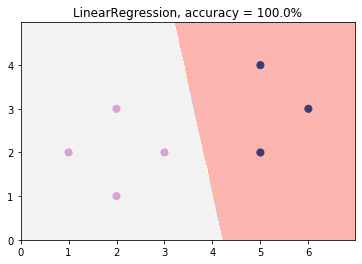

In [5]:
seven_lclf = LinearRegression().fit(seven_X, seven_y)

accuracy = accuracy_score(seven_y, np.heaviside(seven_lclf.predict(seven_X) - 0.5, 1))
plt.title("LinearRegression, accuracy = " + str(accuracy * 100.0) + "%")
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : seven_lclf.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

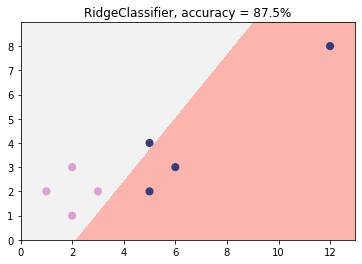

In [7]:
outlier_rclf = RidgeClassifier(alpha=0.0).fit(outlier_X, outlier_y)

accuracy = accuracy_score(outlier_y, outlier_rclf.predict(outlier_X))
plt.title("RidgeClassifier, accuracy = " + str(accuracy * 100.0) + "%")
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, outlier_rclf.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

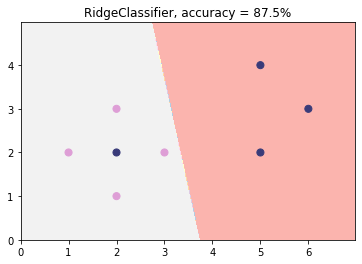

In [9]:
unsep_rclf = RidgeClassifier(alpha=0.0).fit(unsep_X, unsep_y)

accuracy = accuracy_score(unsep_y, unsep_rclf.predict(unsep_X))
plt.title("RidgeClassifier, accuracy = " + str(accuracy * 100.0) + "%")
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, unsep_rclf.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

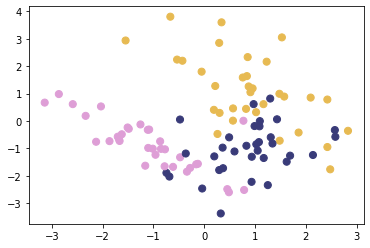

In [11]:
generated_X, generated_y = make_classification(n_features=2, n_informative=2,
                                               n_redundant=0, n_classes=3, n_clusters_per_class=1)

mlutils.plot_2d_clf_problem(generated_X, generated_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [12]:
generated_y_bin = []
generated_clf_bin = []

plt.figure(figsize=(16, 4))
for i in range(3):
    generated_y_i = np.array([1 if y_i == i else 0 for y_i in generated_y])
    generated_y_bin.append(generated_y_i)
    generated_clf_i = LinearRegression().fit(generated_X, generated_y_i)
    generated_clf_bin.append(generated_clf_i)
    
    plt.subplot(1, 3, i + 1)
    plt.title("h" + str(i + 1))
    mlutils.plot_2d_clf_problem(generated_X, generated_y_i, lambda x : generated_clf_i.predict(x) >= 0.5)

def predict(X):
    y = np.empty(len(X))
    h = []
    
    for generated_clf_j in generated_clf_bin:
        h.append(generated_clf_j.predict(X))
        
    for i in range(len(X)):
        max_h = h[0][i];
        max_j = 0
        for j in range(1, len(h)):
            if h[j][i] > max_h:
                max_h = h[j][i]
                max_j = j
        y[i] = max_j
    return y
    ''''predictions = []
    for generated_clf_j in generated_clf_bin:
        predictions.append(generated_clf_j.predict(x.reshape(1, -1)))
    return np.argmax(predictions)'''

plt.figure(figsize=(16, 5))
accuracy = accuracy_score(generated_y, predict(generated_X))
plt.subplot(1, 2, 1)
plt.title("3 x LinearRegression, accuracy = " + str(accuracy * 100.0) + "%")
mlutils.plot_2d_clf_problem(generated_X, generated_y, predict)

generated_rclf = RidgeClassifier(alpha=0.0).fit(generated_X, generated_y)

accuracy = accuracy_score(generated_y, generated_rclf.predict(generated_X))
plt.subplot(1, 2, 2)
plt.title("RidgeClassifier, accuracy = " + str(accuracy * 100.0) + "%")
mlutils.plot_2d_clf_problem(generated_X, generated_y, generated_rclf.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [13]:
def sigmoid(x, alpha=1.0):
    return 1.0 / (1.0 + exp(-alpha * x))

alpha_values = [1, 2, 4]
x_values = np.linspace(-5, 5, 100)
for alpha in alpha_values:
    plt.plot(x_values, sigmoid(x_values, alpha), label="alpha = " + str(alpha))
plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    phi = PolynomialFeatures(1).fit_transform(x.reshape(1, -1))
    return sigmoid(np.dot(phi, w))

def cross_entropy_error(X, y, w, alpha=0.0):
    N = len(X)
    error = 0.0
    for i in range(N):
        h = lr_h(X[i], w)
        loss = -y[i] * log(h) - (1 - y[i]) * log(1 - h)
        error += loss[0]
    return error + 0.5 * alpha * linalg.norm(w[1:])

def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, alpha=0, epsilon=0.000001):
    N = len(X)
    n = len(X[0])
    
    w = np.zeros(n + 1)
    w_trace = []
    
    PHI = PolynomialFeatures(1).fit_transform(X)
    
    previous_error = 0.0
    for it in range(max_iter):
        delta_w = np.zeros(n + 1)
        
        for i in range(N):
            h = lr_h(X[i], w)
            delta_w -= (h - y[i]) * PHI[i]
        
        w[0] += eta * delta_w[0]
        w[1:] = w[1:] * (1 - eta * alpha) + eta * delta_w[1:]
        
        if trace:
            w_trace.append(w.copy())
        
        error = cross_entropy_error(X, y, w, alpha)
        if it != 0 and abs(previous_error - error) < epsilon:
            break
        
        previous_error = error
    
    if trace:
        return w, w_trace
    
    return w

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

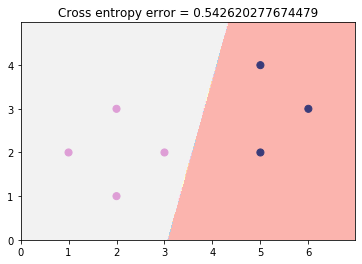

In [26]:
seven_w = lr_train(seven_X, seven_y)
seven_ce_error = cross_entropy_error(seven_X, seven_y, seven_w)
plt.title("Cross entropy error = " + str(seven_ce_error))
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : 1.0 if lr_h(x, seven_w) >= 0.5 else 0.0)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

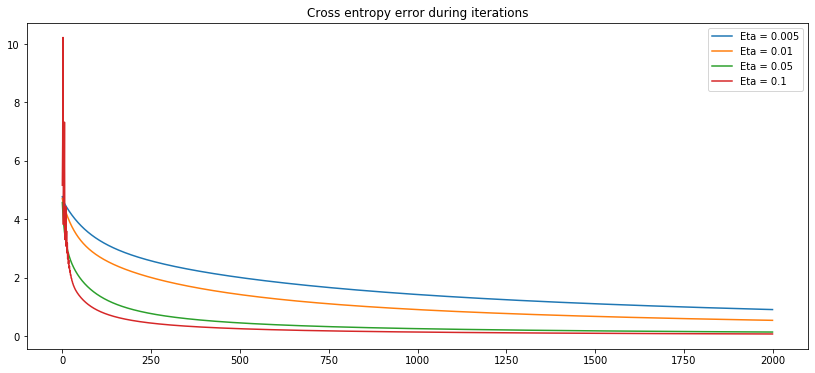

In [16]:
_, seven_w_trace = lr_train(seven_X, seven_y, trace=True)
iters = len(seven_w_trace)

seven_ce_error = []
seven_c_error = []

PHI = PolynomialFeatures(1).fit_transform(seven_X)

for seven_w in seven_w_trace:
    seven_ce_error.append(cross_entropy_error(seven_X, seven_y, seven_w))
    h = heaviside(np.dot(PHI, seven_w), 1)
    seven_c_error.append((1.0 - accuracy_score(seven_y, h)) * len(seven_y))

plt.figure(figsize=(14, 4))
plt.title("Error during iterations")
plt.plot(range(iters), seven_ce_error, label="Cross entropy error")
plt.plot(range(iters), seven_c_error, label="Classification error")
plt.legend()

plt.figure(figsize=(14, 6))
plt.title("Cross entropy error during iterations")
eta_values = [0.005, 0.01, 0.05, 0.1]
for eta in eta_values:
    _, seven_w_trace = lr_train(seven_X, seven_y, eta, trace=True)
    iters = len(seven_w_trace)
    
    seven_ce_error = []
    for seven_w in seven_w_trace:
        seven_ce_error.append(cross_entropy_error(seven_X, seven_y, seven_w))
    
    plt.plot(range(iters), seven_ce_error, label="Eta = " + str(eta))
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [17]:
from sklearn.linear_model import LogisticRegression

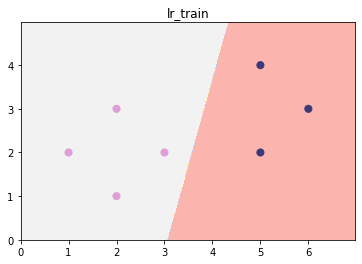

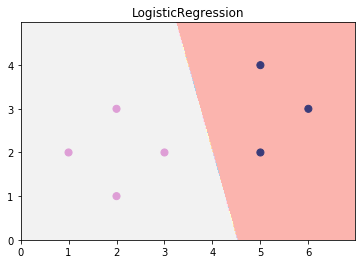

In [18]:
plt.figure()
seven_w = lr_train(seven_X, seven_y)
plt.title("lr_train")
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : 1.0 if lr_h(x, seven_w) >= 0.5 else 0.0)

plt.figure()
seven_lrclf = LogisticRegression(solver="newton-cg", max_iter=2000).fit(seven_X, seven_y)
plt.title("LogisticRegression")
mlutils.plot_2d_clf_problem(seven_X, seven_y, seven_lrclf.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

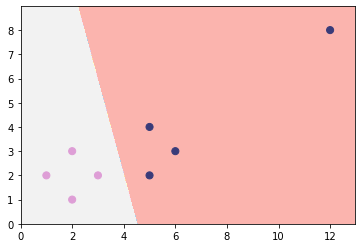

In [30]:
outlier_lrclf = LogisticRegression(solver="newton-cg", max_iter=2000).fit(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, outlier_lrclf.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


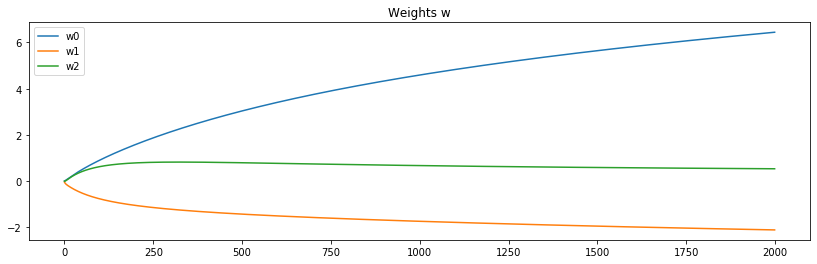

In [20]:
def plot_h_and_w(X, y, w_trace):
    iters = len(w_trace)
    sample_size = len(X)

    h_vectors = []
    for i in range(sample_size):
        h_vectors.append([])
    for w in w_trace:
        for i in range(sample_size):
            h = lr_h(X[i], w)
            h_vectors[i].append(h)

    plt.figure(figsize=(14, 4))
    plt.title("Model output h(x)")
    for i in range(sample_size):
        h = h_vectors[i]
        plt.plot(range(len(h)), h, label="Sample " + str(i))
    plt.legend()

    w_count = len(w_trace[0])
    w_vectors = []
    for i in range(w_count):
        w_vectors.append([row[i] for row in w_trace])

    plt.figure(figsize=(14, 4))
    plt.title("Weights w")
    for i in range(w_count):
        plt.plot(range(iters), w_vectors[i], label="w" + str(i))
    plt.legend()

_, w_trace = lr_train(seven_X, seven_y, trace=True)
plot_h_and_w(seven_X, seven_y, w_trace)

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

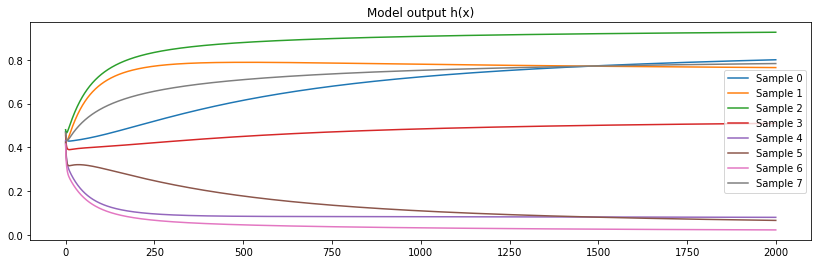

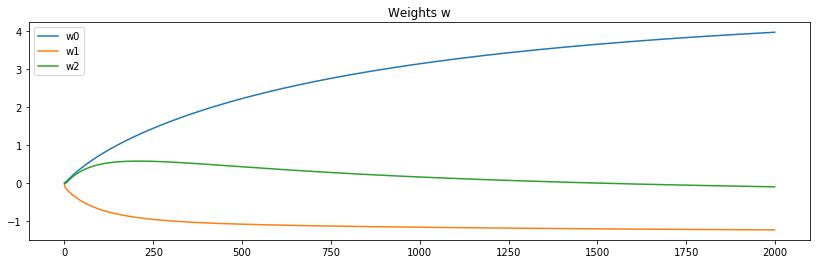

In [21]:
_, w_trace = lr_train(unsep_X, unsep_y, trace=True)
plot_h_and_w(unsep_X, unsep_y, w_trace)

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [22]:
from numpy.linalg import norm

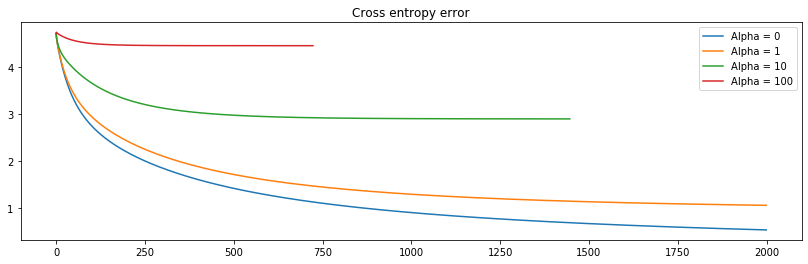

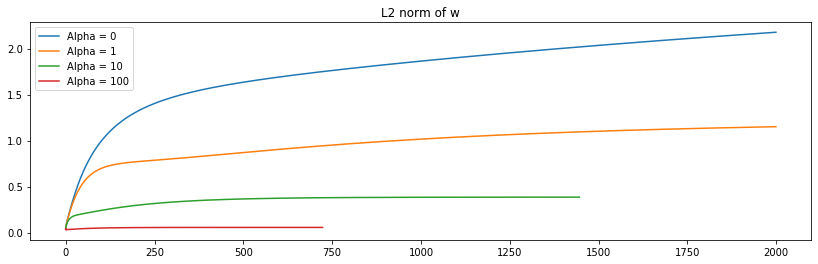

In [23]:
alpha_values = [0, 1, 10, 100]
alpha_count = len(alpha_values)

ce_errors = []
l2_norms = []
for i in range(alpha_count):
    ce_errors.append([])
    l2_norms.append([])

for i in range(alpha_count):
    alpha = alpha_values[i]
    _, w_trace = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    for w in w_trace:
        ce_errors[i].append(cross_entropy_error(seven_X, seven_y, w))
        l2_norms[i].append(linalg.norm(w[1:]))

plt.figure(figsize=(14, 4))
plt.title("Cross entropy error")
for i in range(alpha_count):
    plt.plot(range(len(ce_errors[i])), ce_errors[i], label="Alpha = " + str(alpha_values[i]))
plt.legend()

plt.figure(figsize=(14, 4))
plt.title("L2 norm of w")
for i in range(alpha_count):
    plt.plot(range(len(l2_norms[i])), l2_norms[i], label="Alpha = " + str(alpha_values[i]))
plt.legend()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [24]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

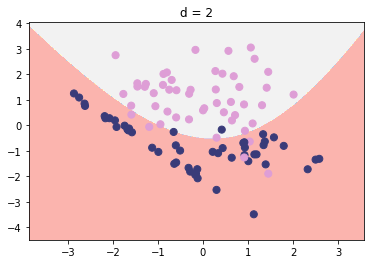

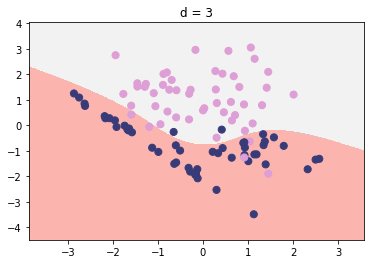

In [50]:
clustered_X, clustered_y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                               n_classes=2, n_clusters_per_class=2)
degree_values = [2, 3]
for d in degree_values:
    poly = PolynomialFeatures(d)
    PHI = poly.fit_transform(clustered_X)
    clustered_clf = LogisticRegression(solver="newton-cg", max_iter=2000, C=0.1).fit(PHI, clustered_y)
    
    plt.figure()
    plt.title("d = " + str(d))
    mlutils.plot_2d_clf_problem(clustered_X, clustered_y, lambda x : clustered_clf.predict(poly.fit_transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?